## Titanic Kaggle Competetion\
### EDS 232: Machine Learning in Environmental Data Science\
#### Madori, Grace, Felicia, Juliet\
[Link to Kaggle Competetion](https://www.kaggle.com/c/titanic/overview)


Import test and train data & convert to `pandas` dataframes

In [32]:
import pandas as pd
import numpy as np
import io
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
test_file_titanic = files.upload()

Saving test.csv to test.csv


In [3]:
train_file_titanic = files.upload()

Saving train.csv to train.csv


In [4]:
test_data = pd.read_csv(io.BytesIO(test_file_titanic['test.csv']))

In [5]:
train_data = pd.read_csv(io.BytesIO(train_file_titanic['train.csv']))

## Initial Data Exploration

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Variable Descriptions:
PassengerId = passenger identifier\
Survived = 0 or 1, 0 = did not survive, 1 = survived\
Pclass = ticket class\
Name = passenger name\
Sex = gender\
Age = passenger age\
SibSp = # of siblings or spouses aboard the Titanic\
Parch = # of parents or children aboard the Titanic\
Ticket = ticket number\
Fare = cost of ticket\
Cabin = cabin number\
Embarked = the port at which the passenger boarded the Titanic


In [8]:
test_data.head()
# this data differs from the train since it doesn't have "survived" column

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
maximum_fare = test_data["Fare"].max()
minimum_fare = test_data["Fare"].min()
fare_range = maximum_fare - minimum_fare
fare_range

512.3292

## Split the variable  `Fare` into 3 groups

In [11]:
pd.qcut(train_data['Fare'], 3).value_counts()

(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: Fare, dtype: int64

In [12]:
train_data['Survived'].groupby(pd.qcut(train_data['Fare'], 3)).mean()

Fare
(-0.001, 8.662]    0.198052
(8.662, 26.0]      0.402778
(26.0, 512.329]    0.559322
Name: Survived, dtype: float64

It seems that passengers that purchased more expensive tickets had the highest survival rates. Next, we investigate the relationship between `Fare` and `Class`.

In [13]:
pd.crosstab(pd.qcut(train_data['Fare'], 5), columns = train_data['Pclass'])

Pclass,1,2,3
Fare,,,
"(-0.001, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


## Random Forest Model #1: predicting if a passenger will survive based on a subset of the variables

Example Notebooks for Random Forest:

https://www.kaggle.com/zlatankr/titanic-random-forest-82-78

https://www.kaggle.com/alexisbcook/titanic-tutorial

In [14]:
y_train = train_data["Survived"]

variables = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
x_train = pd.get_dummies(train_data[variables])
x_test = pd.get_dummies(test_data[variables])

model = RandomForestClassifier(n_estimators=700, max_depth=8, random_state=1, oob_score=True,)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

rf_output_1 = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
rf_output_1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [29]:
from google.colab import files

rf_output_1.to_csv('rf_1.csv', encoding = 'utf-8-sig') 
files.download('rf_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Test the accuracy of our model:

In [15]:
model.fit(x_train.iloc[:, 1:], x_train.iloc[:, 0])
print("%.4f" % model.oob_score_)

0.5589


### The accuracy of our model is 55.89%

Explore Varibale Importance

In [16]:
pd.concat((pd.DataFrame(x_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(model.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
0,SibSp,0.291553
1,Parch,0.241854
4,Embarked_C,0.142755
5,Embarked_Q,0.136935
6,Embarked_S,0.090640
2,Sex_female,0.049093
3,Sex_male,0.047169


### The `SibSp` variable is most important to our Random Forest Model. The variable `Sex_female` is the least important.

## Random Forest Model #2: adding Fare to the model

In [17]:
test_data['Fare'].fillna(train_data['Fare'].mean(), inplace = True)
# this replaces the one missing value of fare with the mean value of fare from the training data 

In [18]:
y_train = train_data["Survived"]

variables = ["Pclass", "SibSp", "Parch", "Embarked", "Fare", "Sex"]
# variables = ["Pclass", "Sex"]
x_train = pd.get_dummies(train_data[variables])
x_test = pd.get_dummies(test_data[variables])

model = RandomForestClassifier(n_estimators=700, max_depth=8, random_state=1, oob_score=True,)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

rf_output_2 = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
rf_output_2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [28]:
from google.colab import files

rf_output_2.to_csv('rf_2.csv', encoding = 'utf-8-sig') 
files.download('rf_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
_2model.fit(x_train.iloc[:, 1:], x_train.iloc[:, 0])
print("%.4f" % model.oob_score_)

0.9068


In [20]:
pd.concat((pd.DataFrame(x_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(model.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
2,Fare,0.770422
0,SibSp,0.080868
1,Parch,0.060664
3,Embarked_C,0.028608
4,Embarked_Q,0.022861
5,Embarked_S,0.018808
7,Sex_male,0.008991
6,Sex_female,0.008778


Fare is by far the most important variable when added to the model. Adding this variable to the model improves the accuracy tremendously. 

## Random Forest Model #3: removing Sex

In [21]:
y_train = train_data["Survived"]

variables = ["Pclass", "SibSp", "Parch", "Embarked", "Fare"]
# variables = ["Pclass", "Sex"]
x_train = pd.get_dummies(train_data[variables])
x_test = pd.get_dummies(test_data[variables])

model = RandomForestClassifier(n_estimators=700, max_depth=8, random_state=1, oob_score=True,)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

rf_output_3 = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
rf_output_3.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,0
4,896,1


In [26]:
from google.colab import files

rf_output_3.to_csv('rf_3.csv', encoding = 'utf-8-sig') 
files.download('rf_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
model.fit(x_train.iloc[:, 1:], x_train.iloc[:, 0])
print("%.4f" % model.oob_score_)

0.9259


In [23]:
pd.concat((pd.DataFrame(x_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(model.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
2,Fare,0.782476
0,SibSp,0.088954
1,Parch,0.066630
3,Embarked_C,0.024095
4,Embarked_Q,0.020516
5,Embarked_S,0.017329


## #4 Decision Tree

In [24]:
# my example split the training data using train_test_split
y_train = train_data["Survived"]

variables = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Fare"]
# variables = ["Pclass", "Sex"]
x_train = pd.get_dummies(train_data[variables])
x_test = pd.get_dummies(test_data[variables])

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

rf_output_4 = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
rf_output_4.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [25]:
from google.colab import files

rf_output_4.to_csv('decision_tree.csv', encoding = 'utf-8-sig') 
files.download('decision_tree.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

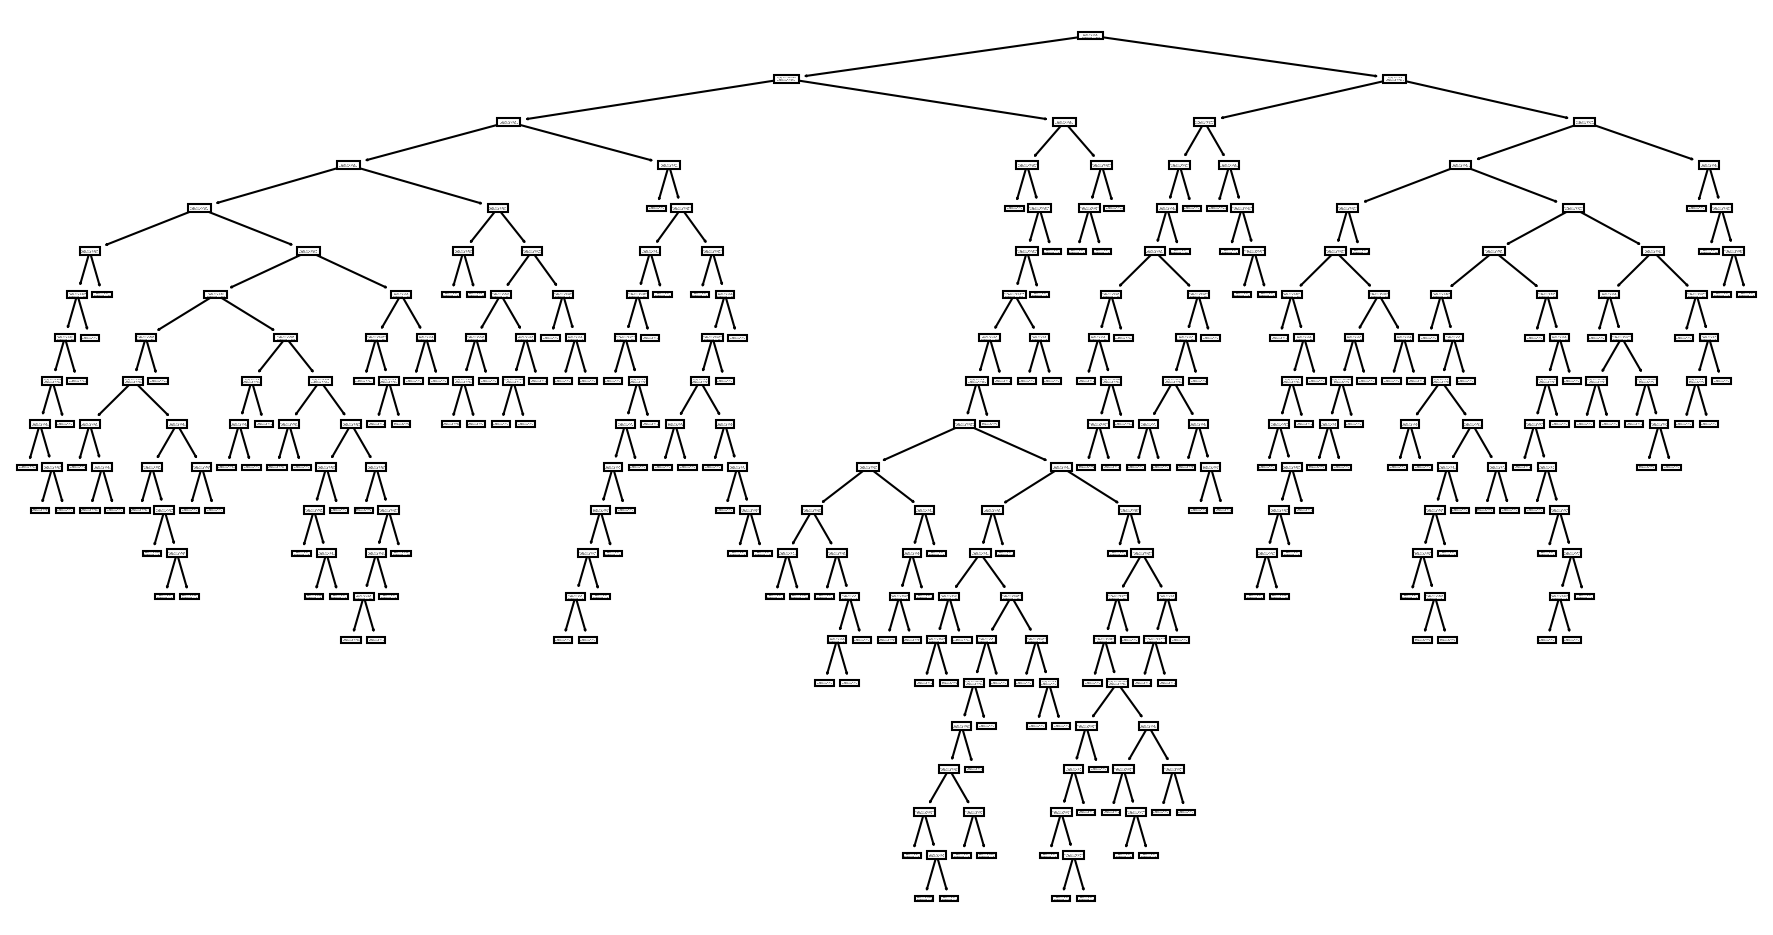

In [35]:
plt.figure(figsize=(15,8),dpi=150)
plot_tree(model);
from google.colab import files
plt.savefig("decision_tree_fig.png")
files.download("decision_tree_fig.png") 